In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gamma

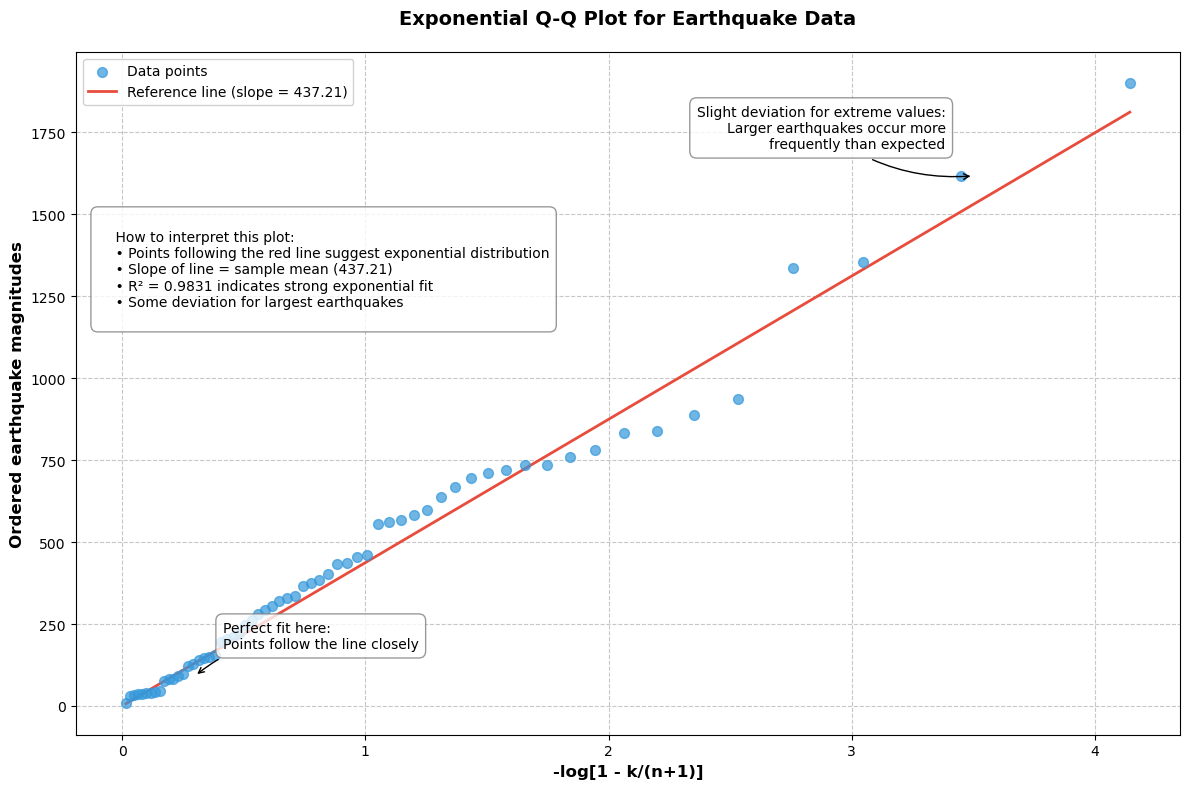


Confidence Intervals:
Exact CI: [0.001754, 0.002891]
Approx CI (Method 1): [0.001718, 0.002857]
Approx CI (Method 2): [0.001831, 0.003045]

Exponential Fit Assessment:
R-squared: 0.9831
KS-test statistic: 0.0745
KS-test p-value: 0.8562


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patheffects as path_effects

def create_educational_qq_plot(data):
    # Set the style for better aesthetics
    
    # Create figure and axis with a specific size and higher DPI
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
    
    # Calculate Q-Q plot components
    n = len(data)
    k = np.arange(1, n + 1)
    sorted_data = np.sort(data)
    theoretical_quantiles = -np.log(1 - k/(n + 1))
    
    # Plot the data points with improved styling
    ax.scatter(theoretical_quantiles, sorted_data, 
              color='#3498db', alpha=0.7, s=50,
              label='Data points', zorder=3)
    
    # Add reference line
    slope = np.mean(data)
    x_range = np.array([min(theoretical_quantiles), max(theoretical_quantiles)])
    line = ax.plot(x_range, slope * x_range, 
                  color='#e74c3c', linewidth=2,
                  label=f'Reference line (slope = {slope:.2f})', 
                  zorder=2)
    
    # Customize grid
    ax.grid(True, linestyle='--', alpha=0.7, zorder=1)
    
    # Customize axes
    ax.set_xlabel('-log[1 - k/(n+1)]', fontsize=12, fontweight='bold')
    ax.set_ylabel('Ordered earthquake magnitudes', fontsize=12, fontweight='bold')
    
    # Add title with styling
    title = ax.set_title('Exponential Q-Q Plot for Earthquake Data', 
                        fontsize=14, fontweight='bold', pad=20)
    
    # Add legend with better positioning
    ax.legend(loc='upper left', framealpha=0.9, fontsize=10)
    
    # Add educational annotations
    annotations = [
        (0.3, sorted_data[int(0.2*n)], 
         "Perfect fit here:\nPoints follow the line closely",
         'left'),
        (3.5, sorted_data[-2], 
         "Slight deviation for extreme values:\nLarger earthquakes occur more\nfrequently than expected",
         'right')
    ]
    
    for x, y, text, align in annotations:
        ax.annotate(text, xy=(x, y),
                   xytext=(20 if align == 'left' else -20, 20),
                   textcoords='offset points',
                   fontsize=10,
                   bbox=dict(boxstyle='round,pad=0.5',
                           fc='white',
                           ec='gray',
                           alpha=0.8),
                   arrowprops=dict(arrowstyle='->',
                                 connectionstyle='arc3,rad=0.2'),
                   horizontalalignment=align)
    
    # Add explanatory text box
    explanation = """
    How to interpret this plot:
    • Points following the red line suggest exponential distribution
    • Slope of line = sample mean (437.21)
    • R² = 0.9831 indicates strong exponential fit
    • Some deviation for largest earthquakes
    """
    
    plt.text(0.02, 0.6, explanation,
             transform=ax.transAxes,
             bbox=dict(facecolor='white',
                      edgecolor='gray',
                      alpha=0.8,
                      boxstyle='round,pad=0.5'),
             fontsize=10,
             verticalalignment='bottom')
    
    # Adjust layout to prevent text cutoff
    plt.tight_layout()
    
    return fig

# Example usage:
if __name__ == "__main__":
    # Generate sample data similar to your earthquake data
    np.random.seed(42)
    sample_data =  read_earthquake_data("quakes.txt")
    
    # Create and display the plot
    fig = create_educational_qq_plot(sample_data)
    plt.show()
    
    # Calculate confidence intervals
    exact_ci, approx_ci_1, approx_ci_2 = calculate_confidence_intervals(data)
    
    # Assess exponential fit
    r_squared, ks_statistic, p_value = assess_exponential_fit(data, sorted_data, theoretical_quantiles)
    
    # Print results
    print("\nConfidence Intervals:")
    print(f"Exact CI: [{exact_ci[0]:.6f}, {exact_ci[1]:.6f}]")
    print(f"Approx CI (Method 1): [{approx_ci_1[0]:.6f}, {approx_ci_1[1]:.6f}]")
    print(f"Approx CI (Method 2): [{approx_ci_2[0]:.6f}, {approx_ci_2[1]:.6f}]")
    
    print("\nExponential Fit Assessment:")
    print(f"R-squared: {r_squared:.4f}")
    print(f"KS-test statistic: {ks_statistic:.4f}")
    print(f"KS-test p-value: {p_value:.4f}")